## 김가네 국민문화예술활동조사 전처리

### 해야할 작업
0. 열 선택(엑셀 활용)
1. 열 순서/이름 변경
    - target을 맨 앞으로
    - 2018년 데이터 합계 계산
2. 2018, 2020년 데이터 병합
3. 자료형 변경
4. NA 값 제거

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [35]:
import pandas as pd
import numpy as np

### 데이터 로드

In [36]:
CS2018_raw = pd.read_csv('./data/국민문화예술활동조사2018.csv', encoding='euc-kr')
CS2020_raw = pd.read_csv('./data/국민문화예술활동조사2020.csv', encoding='euc-kr')

In [37]:
CS2018_raw.head()
CS2020_raw.head()

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예",문3-7. 문화예술행사(직접관람)_선택기준,...,문12. 문화행사 참여시 가장 큰 어려움,문13. 1년 이내 문화공간에서 개최하는 문화행사 참여 의향,문23. 장애등록여부,[분석용] 시도,[분석용] 연령구분(70세이상),[분석용] 성별,[분석용] 혼인상태,[분석용] 가구소득,[분석용] 학력,[분석용] 종사상 지위
0,0,0,0,0,0,0,0,4,1,1,...,3,2,1,11,5,2,1,3,3,5
1,0,0,0,0,0,0,0,1,0,2,...,1,1,1,11,5,2,2,7,3,5
2,0,0,0,0,0,0,0,2,1,2,...,1,1,1,11,2,1,1,6,3,5
3,0,0,0,0,0,0,0,20,0,1,...,4,2,1,11,4,2,2,5,4,5
4,0,0,0,0,2,1,0,5,1,2,...,4,1,1,11,3,2,1,3,4,1


,문1-1.문화예술행사관람실태직접관람횟수_총합,문3-7.문화예술행사(직접관람)_선택기준,문3-8.문화예술행사(직접관람)_관람걸림돌,문4-1.매체를이용한문화예술행사관람횟수_총합,문7-1.문화예술관련많이지출하는항목_1순위,문7-2.문화예술관련향후지출을늘리고싶은항목_1순위,문13.문화행사참여시가장큰어려움,문14.1년이내문화공간에서개최하는문화행사참여의향,성별,연령,학력,동거가구원수,혼인상태,가구주여부,종사상지위,가구소득,시도,장애등록여부
0,0.0,2,2,120.0,28,17,2,1,1,7,1,2,3.0,1,1,4,3,1
1,2.0,9,8,20.0,28,28,7,1,2,7,1,2,2.0,2,3,2,12,1
2,0.0,2,2,NaN,28,17,3,2,2,4,3,2,3.0,1,5,1,6,1
3,2.0,2,1,60.0,1,1,1,1,2,4,3,3,2.0,2,5,6,3,1
4,3.0,1,6,42.0,17,17,6,1,2,3,4,3,2.0,2,5,5,1,1


In [38]:
CS2018_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10558 entries, 0 to 10557
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)  10558 non-null  int64
 1   문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회    10558 non-null  int64
 2   문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)    10558 non-null  int64
 3   문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)          10558 non-null  int64
 4   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극                          10558 non-null  int64
 5   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬                         10558 non-null  int64
 6   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)        10558 non-null  int64
 7   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화                          10558 non-null  int64
 8   문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예             

In [39]:
CS2020_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   문1-1.문화예술행사관람실태직접관람횟수_총합     10098 non-null  float64
 1   문3-7.문화예술행사(직접관람)_선택기준       10099 non-null  int64  
 2   문3-8.문화예술행사(직접관람)_관람걸림돌      10099 non-null  int64  
 3   문4-1.매체를이용한문화예술행사관람횟수_총합     9081 non-null   float64
 4   문7-1.문화예술관련많이지출하는항목_1순위      10099 non-null  int64  
 5   문7-2.문화예술관련향후지출을늘리고싶은항목_1순위  10099 non-null  int64  
 6   문13.문화행사참여시가장큰어려움            10099 non-null  int64  
 7   문14.1년이내문화공간에서개최하는문화행사참여의향   10099 non-null  int64  
 8   성별                           10099 non-null  int64  
 9   연령                           10099 non-null  int64  
 10  학력                           10099 non-null  int64  
 11  동거가구원수                       10099 non-null  int64  
 12  혼인상태                         10067 non-null  float64
 13  가구주여부           

In [40]:
# 문1-1.문화예술행사관람실태직접관람횟수_총합 에서 소수점 존재하는지 확인
import math

_l = []

for human in CS2020_raw['문1-1.문화예술행사관람실태직접관람횟수_총합']:
    _l.append(math.modf(human)[0] > 0)
    
sum(_l)

# 결측값 때문에 float으로 변환됨

0

### 2018년 데이터 정리

#### 열별 합계 구하기

In [41]:
CS2018_raw.columns
# 문화예술행사 관람실태(직접관람) 횟수
# 매체를 이용한 문화예술행사 관람 횟수
# 위 column에 대해 각각 합계를 구해야 함

Index(['문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극', '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예',
       '문3-7. 문화예술행사(직접관람)_선택기준', '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극', '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화',
       '문4-1. 매체를 이용한 문화예술행사 관람

In [42]:
CS2018 = CS2018_raw

In [43]:
CS2018.iloc[:, 0:9].head(1)
CS2018.iloc[:, 11:20].head(1)

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예"
0,0,0,0,0,0,0,0,4,1


,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)",문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극,문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화,"문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑨ 대중음악(가요콘서트), 연예"
0,0,0,0,0,0,0,0,4,40


In [44]:
CS2018['문1-1.문화예술행사관람실태직접관람횟수_총합'] = CS2018.iloc[:, 0:9].apply(np.sum, axis=1)
CS2018['문4-1.매체를이용한문화예술행사관람횟수_총합'] = CS2018.iloc[:, 11:20].apply(np.sum, axis=1)

In [45]:
CS2018.head()

,"문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회","문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)","문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극,문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)",문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화,"문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예",문3-7. 문화예술행사(직접관람)_선택기준,...,문23. 장애등록여부,[분석용] 시도,[분석용] 연령구분(70세이상),[분석용] 성별,[분석용] 혼인상태,[분석용] 가구소득,[분석용] 학력,[분석용] 종사상 지위,문1-1.문화예술행사관람실태직접관람횟수_총합,문4-1.매체를이용한문화예술행사관람횟수_총합
0,0,0,0,0,0,0,0,4,1,1,...,1,11,5,2,1,3,3,5,5,44
1,0,0,0,0,0,0,0,1,0,2,...,1,11,5,2,2,7,3,5,1,2
2,0,0,0,0,0,0,0,2,1,2,...,1,11,2,1,1,6,3,5,3,3
3,0,0,0,0,0,0,0,20,0,1,...,1,11,4,2,2,5,4,5,20,2
4,0,0,0,0,2,1,0,5,1,2,...,1,11,3,2,1,3,4,1,9,7


#### 2018년 데이터 열 선택, 순서, 이름 변경

In [46]:
CS2018_raw.columns

Index(['문1-1. 문화예술행사 관람실태(직접관람) 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문1-1. 문화예술행사 관람실태(직접관람) 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑤ 연극', '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑥ 뮤지컬',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑧ 영화',
       '문1-1. 문화예술행사 관람실태 직접관람 횟수_⑨ 대중음악(가요콘서트), 연예',
       '문3-7. 문화예술행사(직접관람)_선택기준', '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_① 문학행사(시화전, 도서전시회, 작가와의 대화)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_② 미술(사진,서예,건축,디자인 포함) 전시회',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_③ 서양음악(클래식, 오페라, 서양악기 관련)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_④ 전통예술(국악, 풍물, 민속극)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑤ 연극', '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑥ 뮤지컬',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑦ 무용(서양무용, 한국무용, 현대무용)',
       '문4-1. 매체를 이용한 문화예술행사 관람 횟수_⑧ 영화',
       '문4-1. 매체를 이용한 문화예술행사 관람

In [47]:
CS2018 = CS2018[[
    '문1-1.문화예술행사관람실태직접관람횟수_총합',
    '문4-1.매체를이용한문화예술행사관람횟수_총합',
    '문3-7. 문화예술행사(직접관람)_선택기준',
    '문3-8. 문화예술행사(직접관람)_관람 걸림돌',
    '문6-1. 문화예술 관련 많이 지출하는 항목_1순위',
    '문6-2. 문화예술 관련 향후 지출을 늘리고 싶은 항목1순위',
    '문12. 문화행사 참여시 가장 큰 어려움',
    '문13. 1년 이내 문화공간에서 개최하는 문화행사 참여 의향',
    '[분석용] 성별',
    '[분석용] 연령구분(70세이상)',
    '[분석용] 학력',
    '[분석용] 혼인상태',
    '[분석용] 종사상 지위',
    '[분석용] 가구소득',
    '[분석용] 시도',
    '문23. 장애등록여부',
]]

In [48]:
CS2018.columns = [
    'dv_cnt',
    'mv_cnt',
    'standard',
    'block',
    'expense',
    'expense_f',
    'difficulty',
    'intention',
    'sex',
    'age',
    'education',
    'married',
    'work',
    'income',
    'sido',
    'disabled',
]

In [49]:
CS2018.columns

Index(['dv_cnt', 'mv_cnt', 'standard', 'block', 'expense', 'expense_f',
       'difficulty', 'intention', 'sex', 'age', 'education', 'married', 'work',
       'income', 'sido', 'disabled'],
      dtype='object')

In [50]:
CS2018.shape

(10558, 16)

In [51]:
CS2018.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled
0,5,44,1,1,13,13,3,2,2,5,3,1,5,3,11,1


#### 

### 2020년 데이터 정리

In [52]:
CS2020 = CS2020_raw

In [53]:
CS2020.columns

Index(['문1-1.문화예술행사관람실태직접관람횟수_총합', '문3-7.문화예술행사(직접관람)_선택기준',
       '문3-8.문화예술행사(직접관람)_관람걸림돌', '문4-1.매체를이용한문화예술행사관람횟수_총합',
       '문7-1.문화예술관련많이지출하는항목_1순위', '문7-2.문화예술관련향후지출을늘리고싶은항목_1순위',
       '문13.문화행사참여시가장큰어려움', '문14.1년이내문화공간에서개최하는문화행사참여의향', '성별', '연령', '학력',
       '동거가구원수', '혼인상태', '가구주여부', '종사상지위', '가구소득', '시도', '장애등록여부'],
      dtype='object')

In [54]:
CS2020 = CS2020[[
    '문1-1.문화예술행사관람실태직접관람횟수_총합',
    '문4-1.매체를이용한문화예술행사관람횟수_총합',
    '문3-7.문화예술행사(직접관람)_선택기준',
    '문3-8.문화예술행사(직접관람)_관람걸림돌',
    '문7-1.문화예술관련많이지출하는항목_1순위',
    '문7-2.문화예술관련향후지출을늘리고싶은항목_1순위',
    '문13.문화행사참여시가장큰어려움',
    '문14.1년이내문화공간에서개최하는문화행사참여의향',
    '성별', 
    '연령', 
    '학력',
    '혼인상태', 
    '종사상지위', 
    '가구소득', 
    '시도', 
    '장애등록여부',
]]

In [55]:
CS2020.columns = [
    'dv_cnt',
    'mv_cnt',
    'standard',
    'block',
    'expense',
    'expense_f',
    'difficulty',
    'intention',
    'sex',
    'age',
    'education',
    'married',
    'work',
    'income',
    'sido',
    'disabled',
]

In [56]:
CS2020.columns

Index(['dv_cnt', 'mv_cnt', 'standard', 'block', 'expense', 'expense_f',
       'difficulty', 'intention', 'sex', 'age', 'education', 'married', 'work',
       'income', 'sido', 'disabled'],
      dtype='object')

In [57]:
CS2020.shape

(10099, 16)

In [58]:
CS2020.head(1)

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled
0,0.0,120.0,2,2,28,17,2,1,1,7,1,3.0,1,4,3,1


### 2018, 2020년 데이터 병합

In [59]:
CS = pd.concat([CS2018, CS2020], axis=0, ignore_index=True)

In [60]:
CS

,dv_cnt,mv_cnt,standard,block,expense,expense_f,difficulty,intention,sex,age,education,married,work,income,sido,disabled
0,5.0,44.0,1,1,13,13,3,2,2,5,3,1.0,5,3,11,1
1,1.0,2.0,2,6,13,10,1,1,2,5,3,2.0,5,7,11,1
2,3.0,3.0,2,1,9,16,1,1,1,2,3,1.0,5,6,11,1
3,20.0,2.0,1,2,13,13,4,2,2,4,4,2.0,5,5,11,1
4,9.0,7.0,2,1,13,13,4,1,2,3,4,1.0,1,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,7.0,52.0,4,3,17,17,6,1,2,4,4,2.0,1,6,1,1
20653,6.0,43.0,1,2,17,17,2,1,2,3,4,2.0,5,4,1,1
20654,0.0,4.0,1,2,28,17,2,1,1,5,4,2.0,2,6,1,1
20655,5.0,53.0,1,2,17,17,2,1,2,4,4,2.0,5,5,1,1


## 데이터 전처리

1. NA 값 제거/ 변환
2. 데이터 타입 확인
2. 이상치 제거
3. 로그 변환 

### 1 NA값 처리

#### 1.1 NA 확인

NA 확인

In [87]:
# 공통
# '문1-1.문화예술행사관람실태직접관람횟수_총합' 
CS['dv_cnt'].isnull().sum()
# '문4-1.매체를이용한문화예술행사관람횟수_총합'
CS['mv_cnt'].isnull().sum()

# 개인
# '종사상지위'
CS['work'].isnull().sum()
# '가구소득'
CS['income'].isnull().sum()
# '문7-1.문화예술관련많이지출하는항목_1순위'
CS['expense'].isnull().sum()
# '문14.1년이내문화공간에서개최하는문화행사참여의향'
CS['intention'].isnull().sum()


# 소결론:
# 공통에는 NA 값이 1, 1018이지만 개인에는 없음

0

1018

0

0

0

0

홈페이지 상 무응답 코드 확인

In [88]:
# '종사상지위' 
# 무응답 없음

# '가구소득'
# 무응답 없음

# '문7-1.문화예술관련많이지출하는항목_1순위'
# 무응답 없음

# '문14.1년이내문화공간에서개최하는문화행사참여의향'
# 무응답 없음

In [78]:
# 2만여개 중 1개인 NA는 제거
CS.dropna(subset=['dv_cnt'],inplace=True)
CS['dv_cnt'].isnull().sum()

0

#### 1.2 문4-1.매체를이용한문화예술행사관람횟수_총합(mv_cnt) NA 처리

<Axes: xlabel='mv_cnt', ylabel='Count'>

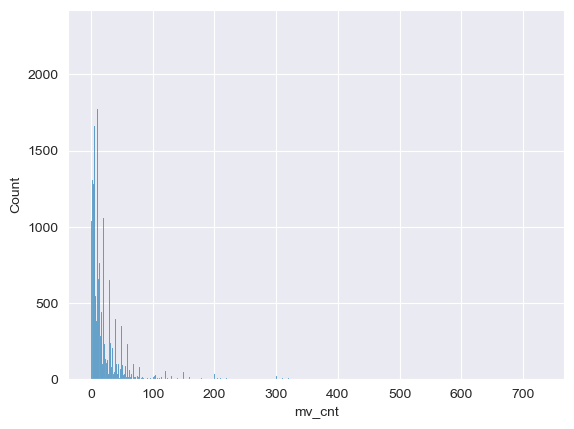

In [81]:
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(CS['mv_cnt'])

In [83]:
# 데이터가 넓게 한쪽으로 매우 치우쳐져 있기 때문에
# 평균과 중위수의 차이가 많이 남
# 이 경우에는 outlier의 영향을 많이 받지 않는 
# median으로 대체하는 것이 옳을 것으로 판단
CS['mv_cnt'].mean()
CS['mv_cnt'].median()

22.002036867298095

11.0

20657 개 중 1018 개는 4.9퍼센트의 데이터로 삭제하기에는 큰 데이터로 판단 따라서 median으로 대체

In [89]:
CS['mv_cnt'] = CS['mv_cnt'].fillna(CS['mv_cnt'].median())

In [90]:
CS.isna().sum()

dv_cnt         0
mv_cnt         0
standard       0
block          0
expense        0
expense_f      0
difficulty     0
intention      0
sex            0
age            0
education      0
married       32
work           0
income         0
sido           0
disabled       0
dtype: int64

int 임을 확인할 수 있음

### 2 데이터 타입 확인

In [100]:
CS.dtypes

# dv_cnt와 mv_cnt가 float임을 확인할 수 있음
# 횟수는 정수 형태기 때문에 NA 때문일 것으로 보임

dv_cnt          int64
mv_cnt          int64
standard        int64
block           int64
expense         int64
expense_f       int64
difficulty      int64
intention       int64
sex             int64
age             int64
education       int64
married       float64
work            int64
income          int64
sido            int64
disabled        int64
dtype: object

In [102]:
# 데이터 타입 변환이 잘 되는 것을 통해 예상이 맞았음을 알 수 있음
CS = CS.astype({'dv_cnt': 'int64', 'mv_cnt' : 'int64'})

### 3 이상치 제거

아래 참조
https://wikidocs.net/16582

이상치 제거 방법은 두 가지 존재:
1. 표준점수 기반
표준점수는 분포가 정규성을 띄어야 하는 것으로 보임
2. IQR 기반

이상치 제거를 할 때 방식 선택 기준을 확인해야 할듯

#### 분포도 확인
mv_cnt와 dv_cnt 모두 정규 분포를 띄지 않는 것으로 보임

<Axes: xlabel='mv_cnt', ylabel='Count'>

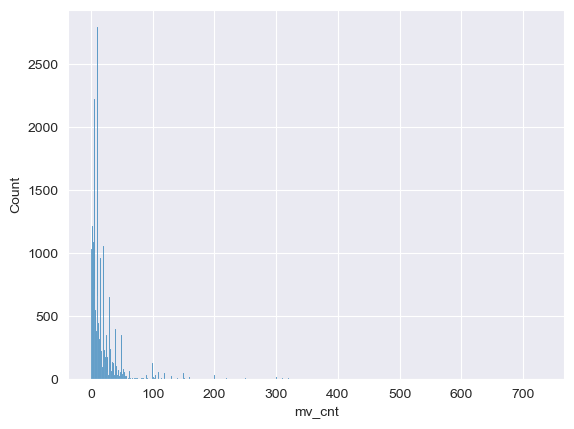

In [109]:
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(CS['mv_cnt'])

<Axes: xlabel='mv_cnt'>

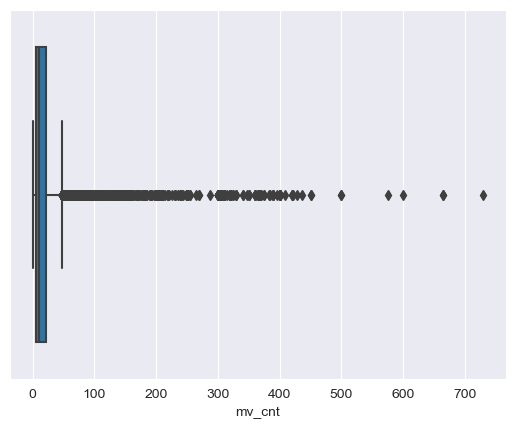

In [117]:
sns.boxplot(x = 'mv_cnt', data = CS)

<Axes: xlabel='dv_cnt', ylabel='Count'>

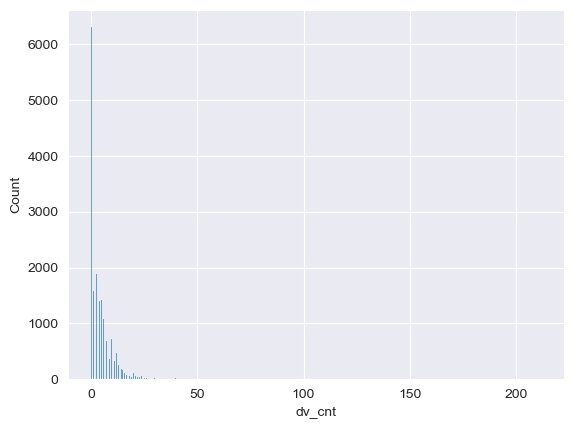

In [111]:
sns.set_style('darkgrid')
sns.histplot(CS['dv_cnt'])

<Axes: xlabel='dv_cnt'>

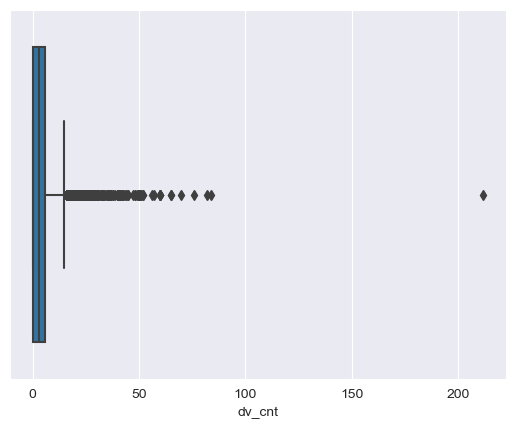

In [118]:
sns.boxplot(x = 'dv_cnt', data = CS)

### 4 분포 확인

아래는 모두 설문조사이기 때문에 이상치를 제거할 필요가 없음

<Axes: xlabel='work', ylabel='Count'>

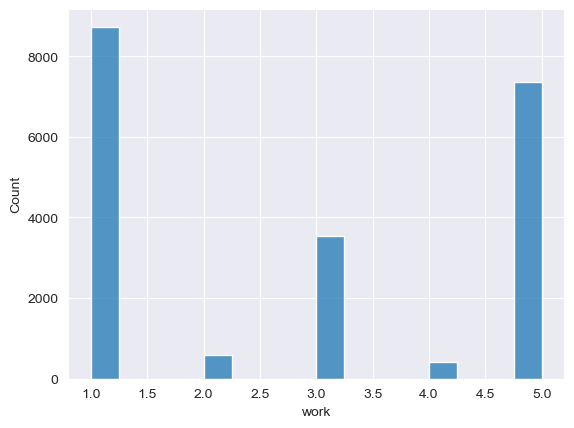

In [103]:
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(CS['work'])

<Axes: xlabel='income', ylabel='Count'>

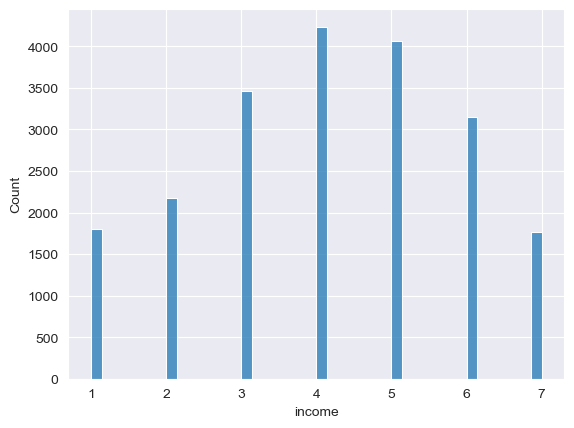

In [105]:
sns.set_style('darkgrid')
sns.histplot(CS['income'])

<Axes: xlabel='expense', ylabel='Count'>

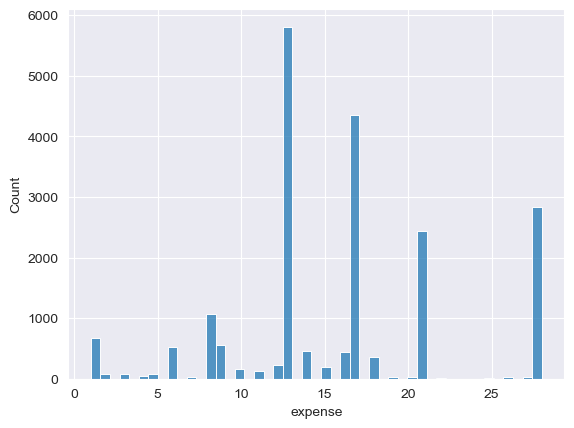

In [108]:
# '문7-1.문화예술관련많이지출하는항목_1순위'

# expense 겹치는거 처리 
sns.set_style('darkgrid')
sns.histplot(CS['expense'])

<Axes: xlabel='intention', ylabel='Count'>

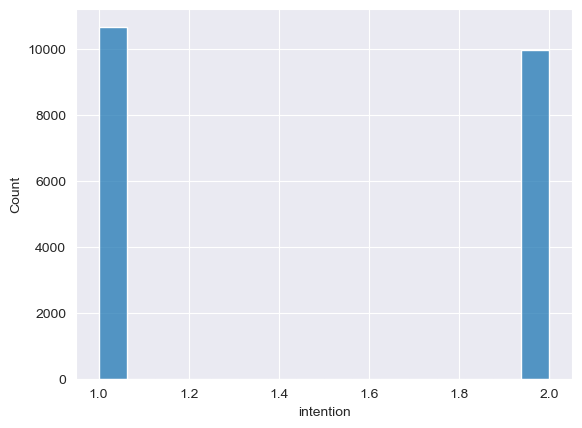

In [107]:
sns.set_style('darkgrid')
sns.histplot(CS['intention'])